### This is the text classification project using naive bayes
#### This project uses the dataset from https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups
#### It is implemented by designing model from scratch 
#### Vocabulary list is created from the dataset which are proved from the link above 
#### Proper X_train and Y_train are created from this 

In [1]:
import os,sys 
import re,string
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Setting stop words and block words

In [2]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
"he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", 
"themselves", "what", "which", "who","don't", "whom", "this", "that", "these", "those", "am", "is", "are", "was","were", "be",
"been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
 "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
 "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", 
 "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both",
 "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too",
 "very", "s", "t", "can", "will", "just", "don", "should", "now"]

block_words = ['sender:','subject:','writes:','references:','organization:','from:','date:','>i','22','|>','>>','reply-to:','xref:','newsgroups:','>in','>the',
'message-id:','lines:','path:','re:','--','sender:','last','better','never','every','even','two','good','used','first','need','going','must','really',
'might','well','without','made','give','look','try','far','less','seem','new','make','many','way','since','using','take','help','thanks','send','free','may',
'see','much','want','find','would','one','like','get','use','also','could','say','us','go','please','said','set','got','sure','come','lot','seems','able','anything','put']

### Importing data from system 

In [3]:
types = [ i for i in os.listdir("D:/ML Projects/Naive Bayes/20 newspaper/20_newsgroups")]
types

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Creating Word frequency dictionary and setting up Y values 

In [4]:
word_dict = {}
y = []
count = 0
for typ in types:
    for j in os.listdir("D:/ML Projects/Naive Bayes/20 newspaper/20_newsgroups/"+typ):
        count = count + 1
        with open("D:/ML Projects/Naive Bayes/20 newspaper/20_newsgroups/"+typ+'/'+j,"r", errors = "ignore") as f:
            message = f.read()
            message = message.lower()
            stripped_message = re.split(r'\W+',message)
            
            y.append(typ)
            for i in stripped_message:
                if not(i.isalpha()) or i in stop_words or i in block_words or len(i)<=2:
                    continue
                if i in word_dict:
                    word_dict[i]+=1
                else:
                    word_dict[i]=1
                
                

print(len(y))
#word_dict

19997


In [5]:
import operator 
sorted_word_list = sorted(word_dict.items(), key=operator.itemgetter(1), reverse = True)
print("length of sorted_word_list",len(sorted_word_list))
#sorted_word_list

length of sorted_word_list 106097


   ### Taking first 2500 features 

In [6]:
top_features = []
for i in range(2500):
    top_features.append(sorted_word_list[i][0])

### plotting index vs frequency graph for sorted_word_list 

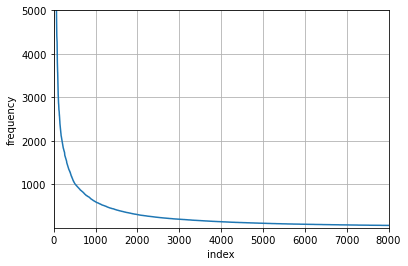

In [7]:
x_axis = []
y_axis = []
for i in range(len(sorted_word_list)):
    x_axis.append(i)
    y_axis.append(sorted_word_list[i][1])
plt.xlabel('index')
plt.ylabel('frequency')
plt.plot(x_axis,y_axis)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show() 

In [8]:
X = np.zeros([count,len(top_features)],int)
c = 0
for typ in types:
    for j in os.listdir("D:/ML Projects/Naive Bayes/20 newspaper/20_newsgroups/"+typ):
        with open("D:/ML Projects/Naive Bayes/20 newspaper/20_newsgroups/"+typ+'/'+j,"r", errors = "ignore") as f:
            message = f.read()
            message = message.lower()
            word = re.split(r'\W+',message)
            
            for j in word:
                if j in top_features:
                    X[c][top_features.index(j)] += 1
            c += 1

In [9]:
X.shape

(19997, 2500)

In [10]:
len(y)

19997

## Implementing Naive Bayes using sklearn 

In [11]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,y,test_size=0.15,random_state=0)
#Y_train

In [12]:
clf=MultinomialNB()
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print("Score on training data:",clf.score(X_train,Y_train))
print("Score on testing data:",clf.score(X_test,Y_test))
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Score on training data: 0.898217332470436
Score on testing data: 0.86
[[129   0   0   0   0   0   1   1   1   0   0   0   1   1   0   2   0   0
    0  21]
 [  0 111   8   7   3   5   1   2   0   0   0   0   3   0   1   0   0   0
    0   0]
 [  0   4 114  12   1   7   3   0   0   0   0   1   1   1   0   0   0   0
    0   0]
 [  0   0   3 121  13   0   2   0   1   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   1   0  17 121   0   6   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  14  11   6   4 106   0   0   0   0   0   1   2   0   0   0   0   0
    0   0]
 [  0   0   0   5   1   0 138   3   2   0   1   1   2   0   0   0   1   0
    0   0]
 [  0   0   0   0   1   0   6 149   6   1   1   0   5   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   3 166   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   2 137   6   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   2 138   0   0   0   0   0   0   0
    0 

## Implementing multinomial without help of libraries, by scratch.

## Creating a dictionary for training data
### Dictionary contains classes as its key and the value of these classes is another dictionary.
### Within this inside dictionary individual features are going to act as keys.
### The values of these keys contain another dictonary and keys are the unique value of each feature
### and the values are going to be the number of counts they are repeated.


### function fit is going to take care of this requirement 

In [13]:
def fit(X_train, Y_train):
    dictionary = {}
    # To get all the unique values for classes i'm going to use set() function. 
    Y_train = np.array(Y_train)
    class_values = set(Y_train)
    # Creating the total_data key for counting the number of rows. 
    dictionary["total_data"] = len(Y_train)
    # Iterating for each class.
    for current_class in class_values:
        word_count_class = 0
        
        
        X_train_current = X_train[Y_train==current_class]
      
        # These are X and Y train for the current iterating class.
        # Now for dictonary inside this main dict we need the number of features. 
        #num_features = X_train.shape[1]
        
        # Now iterating over features for the current_class.
        dictionary[current_class] = {}
        for j in top_features:
            dictionary[current_class][j] = {}
            l = (X_train_current[:,top_features.index(j)]).sum()
            dictionary[current_class][j] = l
            word_count_class += l
         
        dictionary[current_class]["word_in_class"] = word_count_class
        # Inside this nested dictionary I'm going to create total_data_count key to count the number of rows for each class. 
        dictionary[current_class]["total_data_count"] = X_train_current.shape[0]
    return dictionary 

In [14]:
#probability formula implementation 
def probability(dictionary, x, current_class):
    probability_for_class = np.log(dictionary[current_class]["total_data_count"]) - np.log(dictionary["total_data"])
    feature = list(dictionary[current_class].keys())
    feature_number = len(feature) - 2
    # word_in_class and total_data_count are not features 
    for i in range(feature_number):
        x_i_feature = x[i]
        if x_i_feature == 0:
            probability_for_feature_class = 0
        else:
            num = dictionary[current_class][feature[i]]+1
            deno = dictionary[current_class]["word_in_class"] + feature_number
            probability_for_feature_class = np.log(num) - np.log(deno)
        probability_for_class += probability_for_feature_class
    return probability_for_class
        

In [15]:
#probability prediction for a single row 
def predict_row(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if (current_class == "total_data"):
            continue
        p_current_class = probability(dictionary, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
            first_run = False
    return best_class

### Here, predict function is going to find the probablity using navie base 

In [16]:
# defining predict function for probabylity on X_test 
def predict(dictionary, X_test):
    y_pred = []
    for x in X_test:
        x_class = predict_row(dictionary,x)
        y_pred.append(x_class)
    return y_pred

In [17]:
dictionary = fit(X_train,Y_train)
#dictionary 

In [18]:
Y_pred = predict(dictionary,X_test)

In [19]:
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[135   0   0   1   0   0   1   1   1   1   0   0   1   1   0   0   0   0
    2  13]
 [  0 116   4  11   3   2   1   0   0   0   0   0   3   1   0   0   0   0
    0   0]
 [  0   9 103  15   2   9   3   0   0   0   0   1   1   0   0   0   0   0
    1   0]
 [  0   4   0 125   9   0   2   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   2   0  10 130   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  15   9   2   2 114   0   0   1   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   0   0   6   0   0 136   3   0   0   0   1   7   0   0   0   0   0
    1   0]
 [  0   0   0   0   1   1   7 152   2   0   0   0   4   0   0   0   1   0
    1   0]
 [  0   0   0   0   0   0   1   1 167   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2 140   4   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   0 140   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   0   0   0   0   0 139   1   0   0   0